CIFAR10 TUTORIAL


https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py


In [ ]:
# 라이브러리 임포트
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


제공되는 CIFAR10 데이터 셋을 불러와봅시다

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

Files already downloaded and verified


In [ ]:
trainset[0]   # PIL 이미지로 불러옴

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F405D8E6A90>, 6)

pytorch는 dataloader를 통해 데이터 불러오고 변환을 쉽게 할 수 있도록 합니다 .

https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

.toTensor()를 통해 tensor로 변환할수 있으며, 이때 0~1 사이로 변환됩니다



In [ ]:
# 데이터 불러올때 적용할 함수를 transpose를 활용하여 지정한다

transform = transforms.Compose(
    [transforms.ToTensor()]) #  ToTensor()로 타입 변경시 0 ~ 1 사이의 값으로 바뀜

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,   # trainloader를 통해서 배치단위로 데이터를 학습할 수 있도록 합니다. 
                                          shuffle=True, num_workers=2)  # num_workers는 멀티 프로세싱 개수 입력

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
dir(trainset)

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_integrity',
 '_format_transform_repr',
 '_load_meta',
 '_repr_indent',
 'base_folder',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'filename',
 'meta',
 'root',
 'target_transform',
 'targets',
 'test_list',
 'tgz_md5',
 'train',
 'train_list',
 'transform',
 'transforms',
 'url']

In [ ]:
dir(trainloader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

In [ ]:
trainset[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [ ]:
# 위의 출력을 보면 튜플로 (이미지, 라벨)로 저장되어 있습니다. 

trainset[0][0].shape  # 컬러채널이 첫번째로 되어 있습니다. 

torch.Size([3, 32, 32])

데이터를 일부 출력해서 확인해봅니다 

In [ ]:
# 한 batch만 가져옵니다. 

for img, lb in trainloader:
  images, labels = img, lb
  break   

In [ ]:
images.shape  # [batch, channel, width, height]

torch.Size([4, 3, 32, 32])

In [ ]:
lb.shape

torch.Size([4])

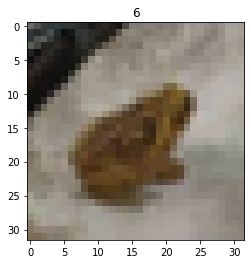

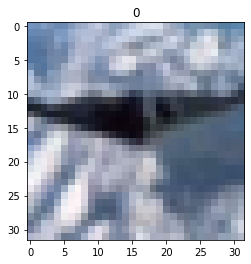

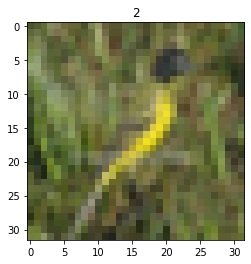

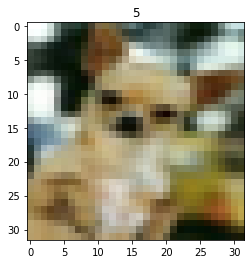

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i,l in zip(images, labels):
  i = np.transpose(i.numpy(), (1,2,0))  # matplotlib로 출력하기 위해서 채널 위치 변경
  plt.figure()
  plt.imshow(i)
  plt.title(l.numpy())


In [ ]:
images[0]

tensor([[[0.4196, 0.3176, 0.2118,  ..., 0.6549, 0.6588, 0.6392],
         [0.2000, 0.1490, 0.1922,  ..., 0.6667, 0.6667, 0.6510],
         [0.1882, 0.3098, 0.3490,  ..., 0.6667, 0.6431, 0.6275],
         ...,
         [0.5255, 0.6157, 0.6745,  ..., 0.5490, 0.5490, 0.5255],
         [0.5255, 0.5647, 0.5725,  ..., 0.5725, 0.5647, 0.5412],
         [0.4941, 0.4863, 0.5020,  ..., 0.5569, 0.5569, 0.5490]],

        [[0.4118, 0.3294, 0.2392,  ..., 0.6275, 0.6314, 0.6118],
         [0.2118, 0.1765, 0.2314,  ..., 0.6392, 0.6392, 0.6235],
         [0.2078, 0.3294, 0.3725,  ..., 0.6392, 0.6157, 0.6000],
         ...,
         [0.4902, 0.5804, 0.6353,  ..., 0.5216, 0.5216, 0.4980],
         [0.4627, 0.5020, 0.5216,  ..., 0.5451, 0.5373, 0.5137],
         [0.4196, 0.4157, 0.4510,  ..., 0.5294, 0.5294, 0.5216]],

        [[0.3843, 0.3137, 0.2392,  ..., 0.5882, 0.5922, 0.5725],
         [0.2196, 0.1725, 0.2196,  ..., 0.6000, 0.6000, 0.5843],
         [0.2078, 0.3255, 0.3608,  ..., 0.6000, 0.5765, 0.

In [ ]:
images[0].max()

tensor(0.7529)

In [ ]:
images[0].min()

tensor(0.0392)

Conv2D

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html


MaxPool2d

torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

Linear

torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html


Covolution 연산 이미지 참고

https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):   # nn.Module subclassing함
    def __init__(self):  # 클래스 초기화
        super().__init__()  # 부모클래스 초기화
        self.conv1 = nn.Conv2d(3, 6, 5) # In, Out, Kernel
        self.pool = nn.MaxPool2d(2, 2)  # Kernel, stride
        self.conv2 = nn.Conv2d(6, 16, 5) # In, Out, Kernel
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # In, Out; Flatten 후의 사이즈 반영
        self.fc2 = nn.Linear(120, 84) # In, Out
        self.fc3 = nn.Linear(84, 10) # In, Out

    def forward(self, x):  # x는 인풋 데이터
        x = self.pool(F.relu(self.conv1(x)))  # conv1 --> relu --> maxpool
        x = self.pool(F.relu(self.conv2(x))) # conv2 --> relu --> maxpool
        x = torch.flatten(x, 1) # flatten all dimensions except batch 
        x = F.relu(self.fc1(x))  # Linear + relu
        x = F.relu(self.fc2(x))  # Linear + relu
        x = self.fc3(x)
        return x

net = Net() # model instance 만들기

In [ ]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


summary를 확인하는 라이브러를 통해 좀 더 상세하게 볼 수 있음

torchsummary의 경우 인풋 사이즈 입력이 필요함

In [ ]:
from torchsummary import summary

model = net.to(device)  # 디바이스를 gpu로
summary(model, (3, 32, 32))   # Input shape을 넣어 줘야함


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


SGD

torch.optim.SGD(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False, *, maximize=False)

https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [ ]:
# optimizer 설정

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  # params는 최적화할 parameter, 보통 모델 파라미터를 넣어준다

Python enumerate()

https://realpython.com/python-enumerate/

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):  #인덱스 0부터 시작
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        #gpu 설정
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)  # 모델 예측
        loss = criterion(outputs, labels)  # 오차 계산
        loss.backward()  # gradient 계산
        optimizer.step()  # weight 업데이트

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.299
[1,  4000] loss: 2.161
[1,  6000] loss: 1.974
[1,  8000] loss: 1.791
[1, 10000] loss: 1.679
[1, 12000] loss: 1.604
[2,  2000] loss: 1.519
[2,  4000] loss: 1.517
[2,  6000] loss: 1.464
[2,  8000] loss: 1.442
[2, 10000] loss: 1.401
[2, 12000] loss: 1.417
Finished Training


testset으로 정확도를 평가해봅니다

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network

        # gpu 변경
        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 48 %


grad 관련 참고 링크

https://pytorch.org/docs/stable/notes/autograd.html